In [5]:
import pandas as pd

# Load the dataset
file_path = r"D:\PW\files\amazon.csv"  # Update this with your file path
df = pd.read_csv(file_path)

# Remove ₹ and convert price columns to numeric
df["discounted_price"] = df["discounted_price"].str.replace("₹", "").str.replace(",", "").astype(float)
df["actual_price"] = df["actual_price"].str.replace("₹", "").str.replace(",", "").astype(float)

# Remove % and convert discount_percentage to numeric
df["discount_percentage"] = df["discount_percentage"].str.replace("%", "").astype(float)

# Convert rating and rating_count to numeric
df["rating"] = pd.to_numeric(df["rating"], errors="coerce")
df["rating_count"] = df["rating_count"].str.replace(",", "").astype(float)

# Display summary after conversion
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1464 non-null   float64
 7   rating_count         1463 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

In [9]:
# Check missing values
print(df.isnull().sum())
# df['rating'].fillna(df['rating'].median(), inplace=True)
# df['rating_count'].fillna(df['rating_count'].median(), inplace=True)


product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


In [12]:
# Check for duplicate rows
df.duplicated().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   float64
 7   rating_count         1465 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

In [14]:
# Q-1 Average rating for each product category
category_avg_rating = df.groupby('category')['rating'].mean().sort_values(ascending=True)
category_avg_rating


category
Home&Kitchen|Kitchen&HomeAppliances|Coffee,Tea&Espresso|CoffeeGrinders|ElectricGrinders                          3.3
Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Keyboard&MiceAccessories|DustCovers    3.4
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                  3.5
Electronics|HomeTheater,TV&Video|Accessories|3DGlasses                                                           3.5
Computers&Accessories|Printers,Inks&Accessories|Printers|InkjetPrinters                                          3.6
                                                                                                                ... 
HomeImprovement|Electrical|CordManagement                                                                        4.5
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters                                         4.5
Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenApplian

In [16]:
# Q-2
# Top products by rating_count within each category
top_rating_count = df.sort_values(by=['category', 'rating_count'], ascending=[True, False])
top_rating_count = top_rating_count[['category', 'product_name', 'rating_count']].drop_duplicates(subset=['category', 'product_name'])
top_rating_count


,category,product_name,rating_count
1157,Car&Motorbike|CarAccessories|InteriorAccessori...,Reffair AX30 [MAX] Portable Air Purifier for C...,1118.0
695,Computers&Accessories|Accessories&Peripherals|...,"rts [2 Pack] Mini USB C Type C Adapter Plug, T...",4426.0
742,Computers&Accessories|Accessories&Peripherals|...,Kanget [2 Pack] Type C Female to USB A Male Ch...,1540.0
906,Computers&Accessories|Accessories&Peripherals|...,Hp Wired On Ear Headphones With Mic With 3.5 M...,7222.0
748,Computers&Accessories|Accessories&Peripherals|...,JBL Commercial CSLM20B Auxiliary Omnidirection...,14969.0
...,...,...,...
858,OfficeProducts|OfficePaperProducts|Paper|Stati...,Pilot V7 Liquid Ink Roller Ball Pen (2 Blue + ...,2450.0
850,OfficeProducts|OfficePaperProducts|Paper|Stati...,"Pentonic Multicolor Ball Point Pen, Pack of 10",4308.0
919,OfficeProducts|OfficePaperProducts|Paper|Stati...,Parker Vector Standard Chrome Trim Ball Pen (I...,3686.0
955,OfficeProducts|OfficePaperProducts|Paper|Stati...,Parker Vector Camouflage Gift Set - Roller Bal...,2493.0


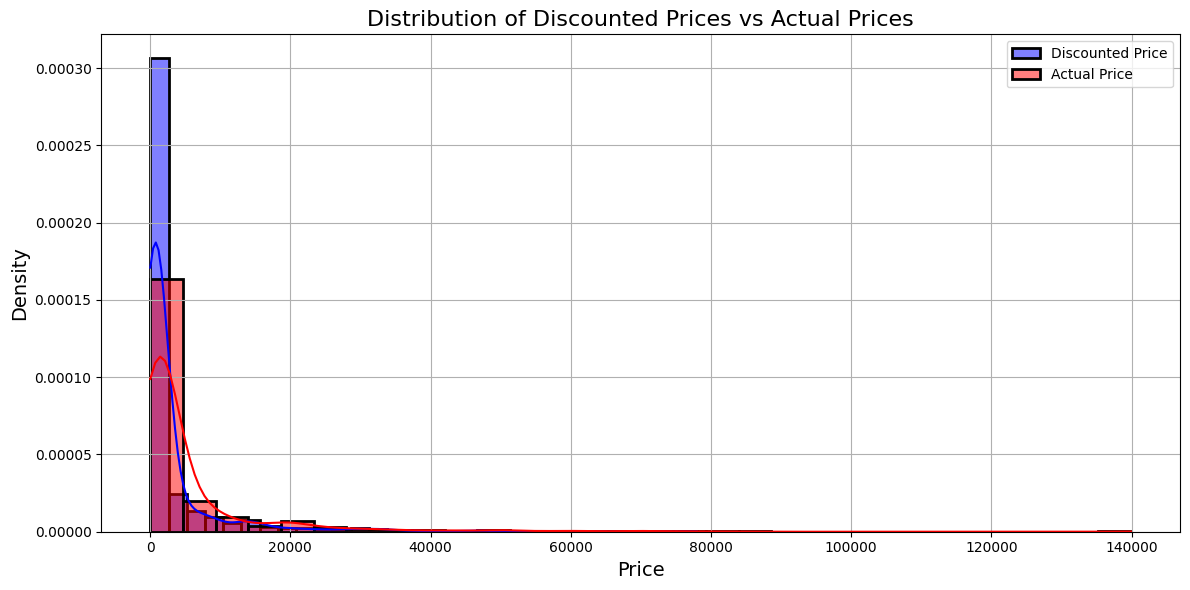

In [19]:
# q-3
# Distribution of discounted prices vs actual prices
import matplotlib.pyplot as plt
import seaborn as sns 
# Improved distribution of discounted prices vs actual prices
plt.figure(figsize=(12, 6))

# Histogram with increased line width for better visibility
sns.histplot(df['discounted_price'], color='blue', label='Discounted Price', kde=True, stat='density', linewidth=2, bins=30)
sns.histplot(df['actual_price'], color='red', label='Actual Price', kde=True, stat='density', linewidth=2, bins=30)

# Adjust plot settings
plt.legend()
plt.title('Distribution of Discounted Prices vs Actual Prices', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.grid(True)
plt.tight_layout()

plt.show()



In [20]:
# Q-4
# Average discount percentage across categories
category_avg_discount = df.groupby('category')['discount_percentage'].mean().sort_values(ascending=False)
category_avg_discount


category
Electronics|Mobiles&Accessories|MobileAccessories|Décor|PhoneCharms                                                 90.0
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|CableConnectionProtectors                          90.0
Electronics|Headphones,Earbuds&Accessories|Earpads                                                                  90.0
Electronics|Headphones,Earbuds&Accessories|Adapters                                                                 88.0
Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Keyboard&MiceAccessories|DustCovers       87.5
                                                                                                                    ... 
OfficeProducts|OfficeElectronics|Calculators|Basic                                                                   0.0
Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|SmallApplianceParts&Accessories|StandMixerAccessories     0.0
Electronics|HomeAudio|M

In [22]:
# Q-5
# Most popular products by rating_count
most_popular_products = df.sort_values(by='rating_count', ascending=False)[['product_name', 'rating_count']].head(10)
most_popular_products


,product_name,rating_count
12,AmazonBasics Flexible Premium HDMI Cable (Blac...,426973.0
65,"Amazon Basics High-Speed HDMI Cable, 6 Feet (2...",426973.0
47,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...",426973.0
684,AmazonBasics Flexible Premium HDMI Cable (Blac...,426972.0
400,boAt Bassheads 100 in Ear Wired Earphones with...,363713.0
352,boAt Bassheads 100 in Ear Wired Earphones with...,363713.0
584,boAt BassHeads 100 in-Ear Wired Headphones wit...,363711.0
370,"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...",313836.0
371,"Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...",313836.0
473,"Redmi 9A Sport (Carbon Black, 2GB RAM, 32GB St...",313832.0


In [23]:
# Q-6
from sklearn.feature_extraction.text import CountVectorizer

# Extract keywords from product names using CountVectorizer
vectorizer = CountVectorizer(stop_words='english', max_features=20)
X = vectorizer.fit_transform(df['product_name'])

# Create a DataFrame with the keyword frequencies
keywords_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Sum up the frequencies of each keyword across all products
keyword_freq = keywords_df.sum(axis=0).sort_values(ascending=False)
keyword_freq


black         530
usb           417
cable         414
charging      247
type          243
fast          212
smart         175
white         170
tv            152
compatible    146
data          136
hd            135
led           129
pro           125
wireless      119
water         114
10            113
remote        109
heater        108
bluetooth     107
dtype: int64

In [25]:
# Q-7
# Most popular reviews based on rating_count
most_popular_reviews = df.sort_values(by='rating_count', ascending=False)[['review_title', 'rating_count', 'product_name']].head(10)
most_popular_reviews


,review_title,rating_count,product_name
12,"It's quite good and value for money,Works well...",426973.0,AmazonBasics Flexible Premium HDMI Cable (Blac...
65,"It's quite good and value for money,Works well...",426973.0,"Amazon Basics High-Speed HDMI Cable, 6 Feet (2..."
47,"It's quite good and value for money,Works well...",426973.0,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ..."
684,"It's quite good and value for money,Works well...",426972.0,AmazonBasics Flexible Premium HDMI Cable (Blac...
400,"Best value for money,HEAD PHONE POUCH NOT RECE...",363713.0,boAt Bassheads 100 in Ear Wired Earphones with...
352,"Best value for money,HEAD PHONE POUCH NOT RECE...",363713.0,boAt Bassheads 100 in Ear Wired Earphones with...
584,"Best value for money,HEAD PHONE POUCH NOT RECE...",363711.0,boAt BassHeads 100 in-Ear Wired Headphones wit...
370,"Best phone for below normal use,Good mobile fo...",313836.0,"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto..."
371,"Best phone for below normal use,Good mobile fo...",313836.0,"Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto..."
473,"Best phone for below normal use,Good mobile fo...",313832.0,"Redmi 9A Sport (Carbon Black, 2GB RAM, 32GB St..."


In [26]:
# Q-8
# Correlation between discounted price and rating
correlation = df[['discounted_price', 'rating']].corr()
correlation


,discounted_price,rating
discounted_price,1.000000,0.120335
rating,0.120335,1.000000


In [27]:
# Q-9
# Top 5 categories based on highest average rating
top_categories_by_rating = df.groupby('category')['rating'].mean().sort_values(ascending=False).head(5)
top_categories_by_rating


category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
OfficeProducts|OfficeElectronics|Calculators|Basic                          4.5
Name: rating, dtype: float64

In [29]:
# Q-10
# Identify products with high discount percentage but low rating

# Categories with low average ratings.
# Products with low ratings but high ratings count (indicating potential issues or opportunities for improvement).
# Products with high discount_percentage but low rating (indicating that a higher discount doesn't necessarily lead to better ratings).
high_discount_low_rating = df[df['discount_percentage'] > 50].sort_values(by='rating', ascending=True)
high_discount_low_rating[['product_name', 'discount_percentage', 'rating']]


,product_name,discount_percentage,rating
1243,"Personal Size Blender, Portable Blender, Batte...",55.0,2.3
1286,MR. BRAND Portable USB Juicer Electric USB Jui...,77.0,2.8
545,SHREENOVA ID116 Plus Bluetooth Fitness Smart W...,86.0,2.8
1449,IONIX Tap filter Multilayer | Activated Carbon...,72.0,2.9
263,7SEVEN Compatible LG TV Remote Suitable for LG...,60.0,3.0
...,...,...,...
459,Spigen EZ Fit Tempered Glass Screen Protector ...,66.0,4.7
1223,"FIGMENT Handheld Milk Frother Rechargeable, 3-...",56.0,4.7
1299,"Instant Pot Air Fryer, Vortex 2QT, Touch Contr...",75.0,4.8
174,Syncwire LTG to USB Cable for Fast Charging Co...,80.0,5.0
